# **Installing and Importing needed Libraries while setting up the data path**

In [39]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript
from base64 import b64decode
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from keras import models, layers, optimizers, utils, losses
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import save_model
epochs = 10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **Preparing the Train/Validation data**

In [30]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Convolutional Neural Network Construction**

In [31]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

# **Data Augmentation**

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

steps_per_epoch=len(train_generator)//10

# **Compiling and Training the Model**

In [37]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_fit = emotion_model.fit_generator(
        train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/10


C:\Users\Youssefch\AppData\Local\Temp\ipykernel_110124\3202779118.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fit = emotion_model.fit_generator(


449/449 [==============================] - 61s 133ms/step - loss: 1.0023 - accuracy: 0.6253 - val_loss: 1.0761 - val_accuracy: 0.6023
Epoch 2/10
449/449 [==============================] - 60s 133ms/step - loss: 0.9623 - accuracy: 0.6393 - val_loss: 1.0579 - val_accuracy: 0.6113
Epoch 3/10
449/449 [==============================] - 60s 134ms/step - loss: 0.9301 - accuracy: 0.6504 - val_loss: 1.0681 - val_accuracy: 0.6091
Epoch 4/10
449/449 [==============================] - 65s 144ms/step - loss: 0.8902 - accuracy: 0.6660 - val_loss: 1.0605 - val_accuracy: 0.6091
Epoch 5/10
449/449 [==============================] - 64s 142ms/step - loss: 0.8636 - accuracy: 0.6760 - val_loss: 1.0406 - val_accuracy: 0.6131
Epoch 6/10
449/449 [==============================] - 62s 139ms/step - loss: 0.8263 - accuracy: 0.6915 - val_loss: 1.0636 - val_accuracy: 0.6141
Epoch 7/10
449/449 [==============================] - 63s 139ms/step - loss: 0.7953 - accuracy: 0.6996 - val_loss: 1.0814 - val_accuracy: 0.6

# **Saving the Model**

In [38]:
emotion_model.save('emotion_model.h5')

c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **----------------------------------------------------------------------------------------------**

# **Convolutional Neural Network Construction Resnet**

In [40]:


def resnet_block(x, filters, kernel_size=(3,3), stride=(1,1), conv_first=True):
    if conv_first:
        x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    else:
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    return x

input_shape = (48, 48, 1)
num_classes = 7

input_tensor = Input(shape=input_shape)

x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = resnet_block(x, 32)
x = resnet_block(x, 64, conv_first=False)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = resnet_block(x, 128)
x = resnet_block(x, 128, conv_first=False)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

resnet_model = Model(inputs=input_tensor, outputs=output)


# **Compiling and Training the Model Resnet**

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


history = resnet_model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10


C:\Users\Youssefch\AppData\Local\Temp\ipykernel_110124\335807183.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model.fit_generator(


449/449 [==============================] - 179s 395ms/step - loss: 1.8986 - accuracy: 0.3253 - val_loss: 1.6434 - val_accuracy: 0.3647
Epoch 2/10
449/449 [==============================] - 175s 389ms/step - loss: 1.4983 - accuracy: 0.4158 - val_loss: 1.4082 - val_accuracy: 0.4703
Epoch 3/10
449/449 [==============================] - 180s 401ms/step - loss: 1.4127 - accuracy: 0.4520 - val_loss: 1.4605 - val_accuracy: 0.4439
Epoch 4/10
449/449 [==============================] - 181s 403ms/step - loss: 1.3358 - accuracy: 0.4904 - val_loss: 1.3114 - val_accuracy: 0.4933
Epoch 5/10
449/449 [==============================] - 179s 399ms/step - loss: 1.2736 - accuracy: 0.5104 - val_loss: 1.2568 - val_accuracy: 0.5185
Epoch 6/10
449/449 [==============================] - 181s 403ms/step - loss: 1.2200 - accuracy: 0.5342 - val_loss: 1.2524 - val_accuracy: 0.5180
Epoch 7/10
449/449 [==============================] - 173s 384ms/step - loss: 1.1595 - accuracy: 0.5570 - val_loss: 1.2767 - val_accura

# **Saving the Model RESNET**

In [42]:
resnet_model.save('emotion_modelRESNET.h5')

c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **----------------------------------------------------------------------------------------------**

# **Convolutional Neural Network Construction VGG16**

In [43]:


emotion_modelVGG16= Sequential()

emotion_modelVGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
emotion_modelVGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

emotion_modelVGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

emotion_modelVGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

emotion_modelVGG16.add(Flatten())
emotion_modelVGG16.add(Dense(4096, activation='relu'))
emotion_modelVGG16.add(Dropout(0.5))
emotion_modelVGG16.add(Dense(4096, activation='relu'))
emotion_modelVGG16.add(Dropout(0.5))
emotion_modelVGG16.add(Dense(7, activation='softmax'))


# **Compiling and Training the Model**

In [44]:
emotion_modelVGG16.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_fit = emotion_modelVGG16.fit(
        train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/10
449/449 [==============================] - 488s 1s/step - loss: 1.9022 - accuracy: 0.2480 - val_loss: 1.8160 - val_accuracy: 0.2471
Epoch 2/10
449/449 [==============================] - 461s 1s/step - loss: 1.8125 - accuracy: 0.2510 - val_loss: 1.8151 - val_accuracy: 0.2471
Epoch 3/10
449/449 [==============================] - 454s 1s/step - loss: 1.8125 - accuracy: 0.2513 - val_loss: 1.8130 - val_accuracy: 0.2471
Epoch 4/10
449/449 [==============================] - 435s 969ms/step - loss: 1.8116 - accuracy: 0.2513 - val_loss: 1.8139 - val_accuracy: 0.2471
Epoch 5/10
449/449 [==============================] - 421s 937ms/step - loss: 1.8110 - accuracy: 0.2513 - val_loss: 1.8136 - val_accuracy: 0.2471
Epoch 6/10
449/449 [==============================] - 416s 927ms/step - loss: 1.8111 - accuracy: 0.2513 - val_loss: 1.8140 - val_accuracy: 0.2471
Epoch 7/10
449/449 [==============================] - 414s 923ms/step - loss: 1.8109 - accuracy: 0.2513 - val_loss: 1.8148 - val_accu

# **Saving the Model VGG16**

In [45]:
emotion_modelVGG16.save('emotion_modelVGG16.h5')

c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **----------------------------------------------------------------------------------------------**

# **Load the Custom Model**

In [46]:
loaded_model = load_model("emotion_model.h5")

# **Model Evaluation**

In [47]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = loaded_model.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 4s 31ms/step
Test Accuracy: 62.34%


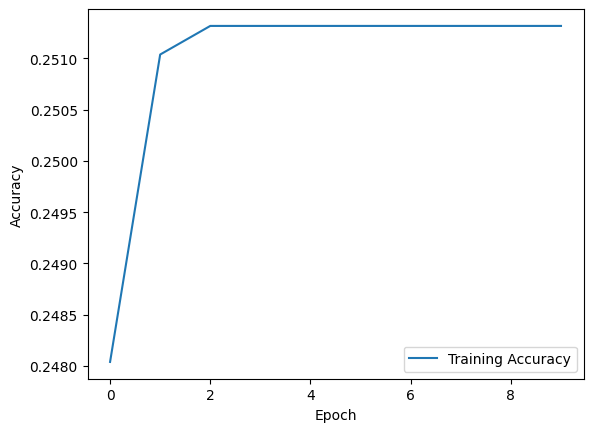

In [66]:
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

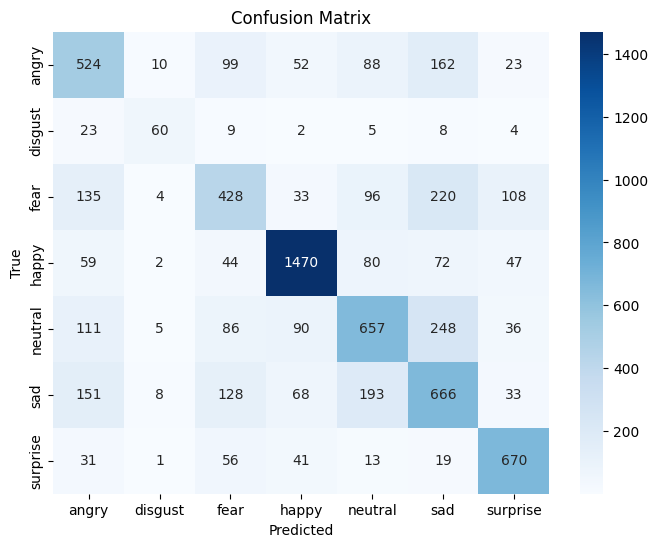

In [51]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [52]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.51      0.55      0.53       958
     disgust       0.67      0.54      0.60       111
        fear       0.50      0.42      0.46      1024
       happy       0.84      0.83      0.83      1774
     neutral       0.58      0.53      0.56      1233
         sad       0.48      0.53      0.50      1247
    surprise       0.73      0.81      0.76       831

    accuracy                           0.62      7178
   macro avg       0.61      0.60      0.61      7178
weighted avg       0.62      0.62      0.62      7178



# **ROC Curves**

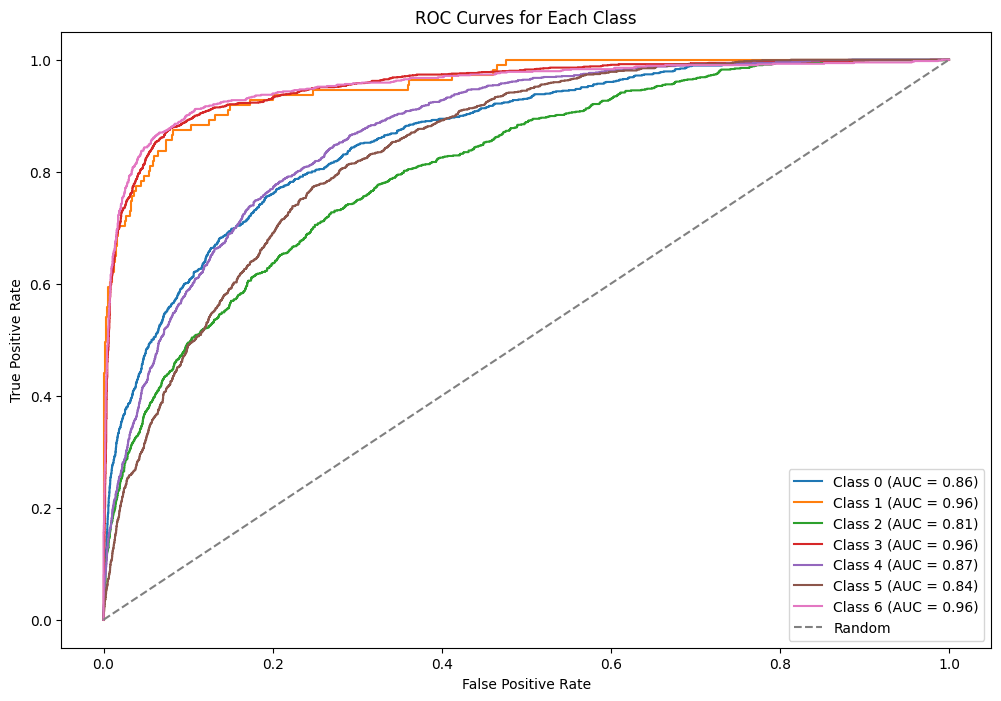

In [53]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **Load the Model VGG16**

In [54]:
loaded_modelVGG16 = load_model("emotion_modelVGG16.h5")

# **Model Evaluation**

In [55]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = loaded_modelVGG16.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 27s 239ms/step
Test Accuracy: 24.71%


# **Training Accuracy**

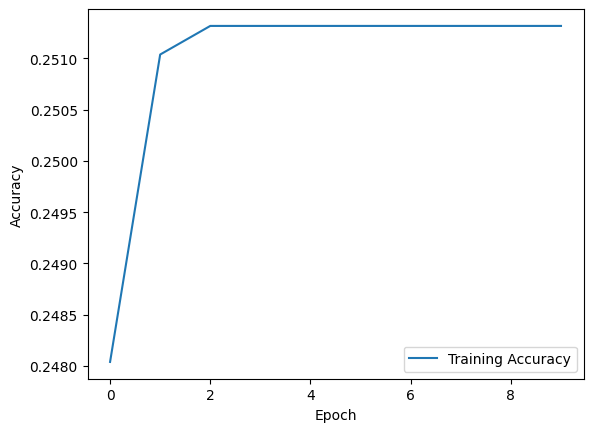

In [65]:

plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

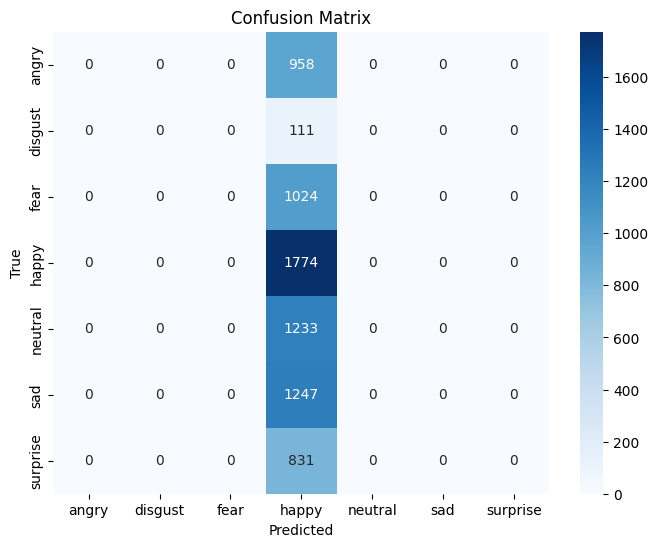

In [59]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [60]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
     disgust       0.00      0.00      0.00       111
        fear       0.00      0.00      0.00      1024
       happy       0.25      1.00      0.40      1774
     neutral       0.00      0.00      0.00      1233
         sad       0.00      0.00      0.00      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.25      7178
   macro avg       0.04      0.14      0.06      7178
weighted avg       0.06      0.25      0.10      7178



c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# **ROC Curves**

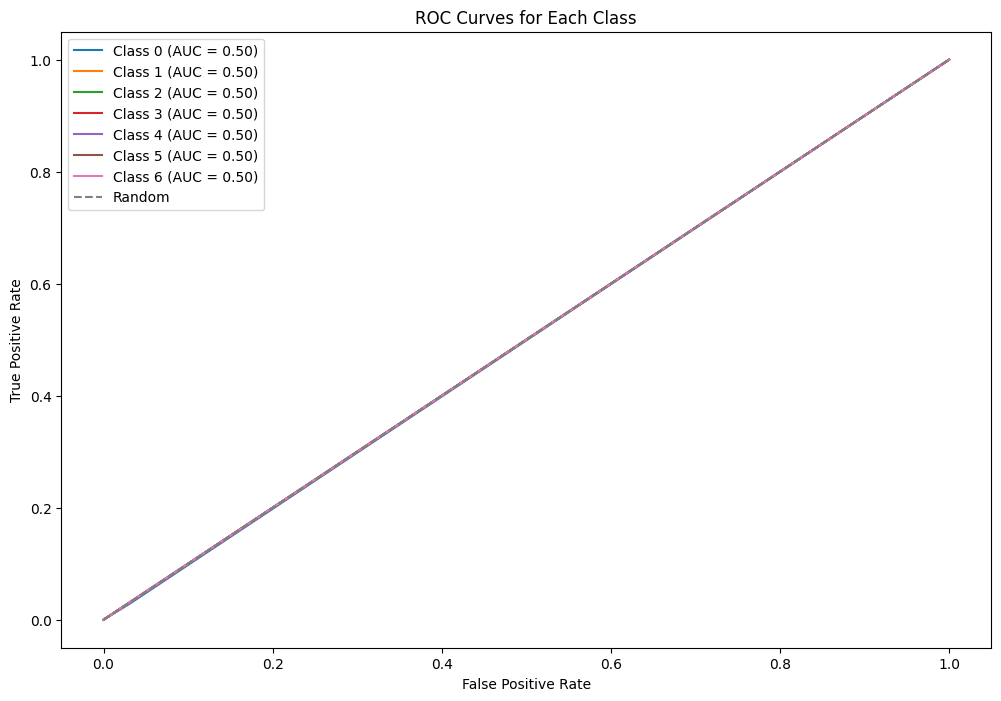

In [61]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **Load the Model RESNET**

In [62]:
loaded_modelRESNET = load_model("emotion_modelRESNET.h5")

# **Model Evaluation**

In [63]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = loaded_modelRESNET.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 10s 84ms/step
Test Accuracy: 54.68%


# **Training VS Validation Accuracy**

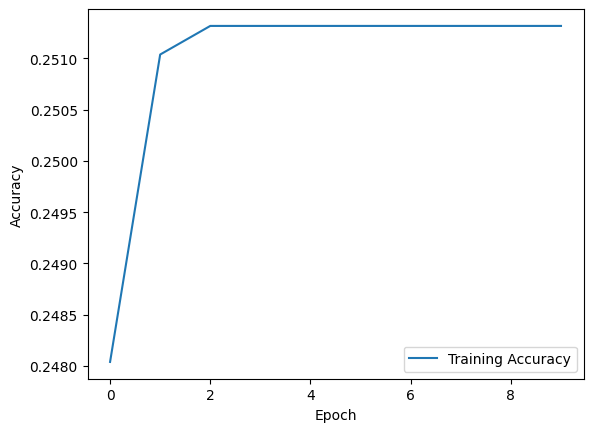

In [67]:
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Confusion Matrix**

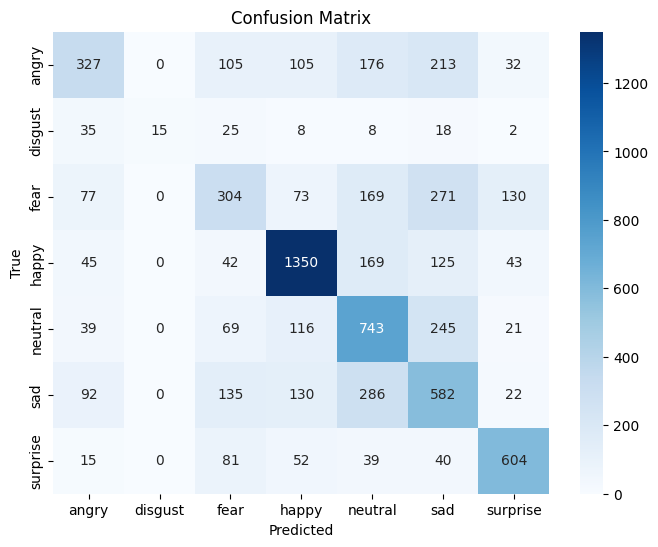

In [68]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [69]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.52      0.34      0.41       958
     disgust       1.00      0.14      0.24       111
        fear       0.40      0.30      0.34      1024
       happy       0.74      0.76      0.75      1774
     neutral       0.47      0.60      0.53      1233
         sad       0.39      0.47      0.42      1247
    surprise       0.71      0.73      0.72       831

    accuracy                           0.55      7178
   macro avg       0.60      0.48      0.49      7178
weighted avg       0.55      0.55      0.54      7178



# **ROC Curves**

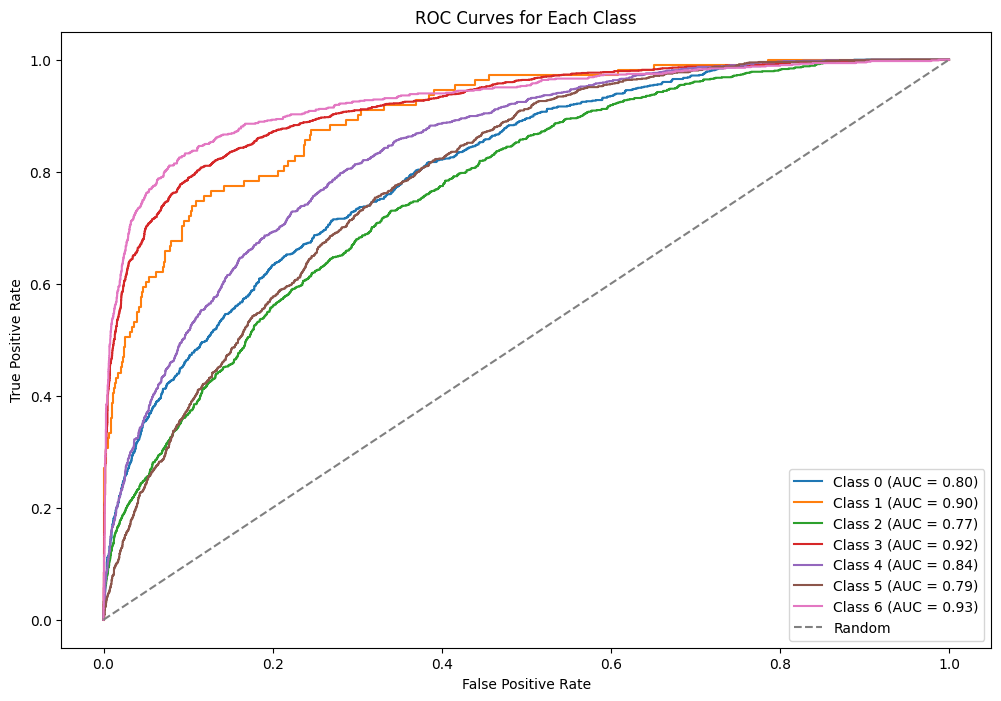

In [70]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **Emotion Prediction**

In [72]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2  
import os
from flask import Flask, request

In [71]:


def predict_emotion(model_path, img_path):
    if not os.path.isfile(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        return None

    loaded_model = load_model(model_path)

    if not os.path.isfile(img_path):
        print(f"Error: Image file '{img_path}' not found.")
        return None

    input_size = 48  

    img_color = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (input_size, input_size))
    img_array = np.expand_dims(img_gray, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  

    predictions = loaded_model.predict(img_array)

    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(predictions)]
    
    plt.imshow(img_color)
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.show()
    

    return predicted_emotion

app = Flask(__name__)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')







@app.route('/api/MyEmotion', methods=['GET'])
def compareface():
    camera = cv2.VideoCapture(0)

    if not camera.isOpened():
        print("Failed to open the camera")
        exit()
    text = "When your face is detected, click \"SPACE\" to save or \"ESC\" to cancel!"  
    while True:
        ret, frame = camera.read()
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        font = cv2.FONT_HERSHEY_COMPLEX 
        font_scale = 0.5 
        thickness = 1  
        color = (0, 255, 0)  
        text_color_bg=(0, 0, 0)
        image_height, image_width, _ = frame.shape
        text_box_width, text_box_height = cv2.getTextSize(text, font, font_scale, thickness)[0]
        text_x = (image_width - text_box_width) // 2
        position =(text_x, 40)  
        x, y = position
        cv2.rectangle(frame, (text_x-40, 15), (x + text_box_width+40, y + text_box_height), text_color_bg, -1)
        cv2.putText(frame, text, position, font, font_scale, color, thickness)


        cv2.imshow("Click \"SPACE\" to save,\"ECHAP\" to cancel!", frame)
        cv2.setWindowProperty("Click \"SPACE\" to save,\"ECHAP\" to cancel!", cv2.WND_PROP_TOPMOST, 1)
        
        model_path = "emotion_model.h5"
        image_path = r"C:\Users\kalil\OneDrive\Bureau\flash\tryEmotion\compare.jpg" 
        cv2.imwrite(image_path, frame)

        predicted_emotion = predict_emotion(model_path, image_path)
        print("predicted_emotion : ",predicted_emotion)
        text = f"Predicted Emotion: {predicted_emotion}"
        
        
        key = cv2.waitKey(1)
        if key == ord(' '):
            if not ret:
                print("Failed to capture the frame")
                exit()
        if key == 27:
            cv2.destroyAllWindows()
            camera.release()
            return "Operation Canceled!"

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Nov/2023 21:33:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [30/Nov/2023 21:33:46] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [30/Nov/2023 21:36:47] "GET / HTTP/1.1" 404 -
